In [5]:
import numpy as np
import pandas as pd 
from autogluon.tabular import TabularPredictor
data = pd.read_parquet("clean.parquet")

pd.set_option('display.max_rows', 200)  # Replace 10 with your desired limit
data

,time,consumption,temperature,temperature_mean_lag_1h,temperature_mean_lag_3h,temperature_mean_lag_6h,date_of_prediction,consumption-lag_5d,consumption-lag_6d,consumption-lag_7d,...,temperature_mean_lag_14d,day_of_week,day_of_year,hour_of_day,location_bergen,location_helsingfors,location_oslo,location_stavanger,location_tromsø,location_trondheim
0,2022-04-26 00:00:00,0.583449,4.0,4.1,4.233333,6.166667,2022-04-25,0.643492,0.690125,0.740671,...,9.243452,1,116,0,1,0,0,0,0,0
1,2022-04-26 01:00:00,0.597281,3.3,4.0,4.033333,5.133333,2022-04-25,0.643492,0.690125,0.740671,...,9.243452,1,116,1,1,0,0,0,0,0
2,2022-04-26 02:00:00,0.592792,2.9,3.3,3.800000,4.350000,2022-04-25,0.643492,0.690125,0.740671,...,9.243452,1,116,2,1,0,0,0,0,0
3,2022-04-26 03:00:00,0.604434,2.9,2.9,3.400000,3.816667,2022-04-25,0.643492,0.690125,0.740671,...,9.243452,1,116,3,1,0,0,0,0,0
4,2022-04-26 04:00:00,0.664663,2.6,2.9,3.033333,3.533333,2022-04-25,0.643492,0.690125,0.740671,...,9.243452,1,116,4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46879,2023-04-02 17:00:00,3.927136,3.6,5.9,6.366667,6.400000,2023-04-01,3.619001,3.423687,3.655065,...,-1.960119,6,92,17,0,0,0,0,0,1
46880,2023-04-02 18:00:00,4.067940,3.0,3.6,5.400000,6.033333,2023-04-01,3.619001,3.423687,3.655065,...,-1.960119,6,92,18,0,0,0,0,0,1
46881,2023-04-02 19:00:00,4.093120,1.4,3.0,4.166667,5.433333,2023-04-01,3.619001,3.423687,3.655065,...,-1.960119,6,92,19,0,0,0,0,0,1
46882,2023-04-02 20:00:00,3.990767,-2.7,1.4,2.666667,4.516667,2023-04-01,3.619001,3.423687,3.655065,...,-1.960119,6,92,20,0,0,0,0,0,1


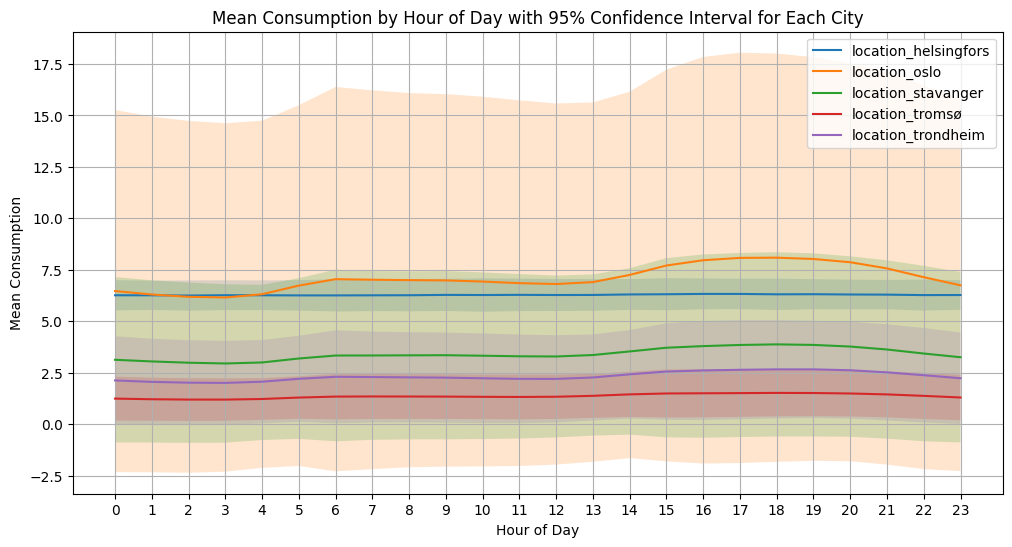

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the DataFrame by 'hour_of_day' and calculate the mean and standard deviation for each city
city_columns = ['location_helsingfors', 'location_oslo', 'location_stavanger', 'location_tromsø', 'location_trondheim']

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Iterate through each city and plot the mean consumption with shaded std region
for city in city_columns:
    city_data = data[data[city] == 1]
    mean_consumption_by_hour = city_data.groupby('hour_of_day')['consumption'].mean()
    std_consumption_by_hour = city_data.groupby('hour_of_day')['consumption'].std()
    
    plt.plot(mean_consumption_by_hour.index, mean_consumption_by_hour, label=city)
    
    # Plot the shaded region for the 95% confidence interval (1.96 times standard deviation)
    plt.fill_between(mean_consumption_by_hour.index, 
                     mean_consumption_by_hour - 1.96 * std_consumption_by_hour, 
                     mean_consumption_by_hour + 1.96 * std_consumption_by_hour, alpha=0.2)

# Customize the plot
plt.title('Mean Consumption by Hour of Day with 95% Confidence Interval for Each City')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption')
plt.xticks(range(24), labels=[str(i) for i in range(24)])
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
